MVO의 문제점
1. 입력 데이터의 작은 변화에도 도출되는 포트폴리오 구성비중이 크게 변한다.
2. 몇 개의 자산에 비중이 쏠리는 corner solution이 나타나는 경우가 있다.
3. 투자자가 가지고 있는 정보를 녹여낼 수 있는 방법이없다. 따라서 견해가 다른 매니저일지라도 같은 MVO포트폴리오를 얻게 된다.

블랙 리터만 모델에 사용되는 수식은 다음과 같다.
$$E[R] = [(\tau\Sigma)^-1+P^T$$

In [2]:
import numpy as np
import pandas as pd
from numpy.linalg import inv
import random
import pandas_datareader.data as web
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,6)

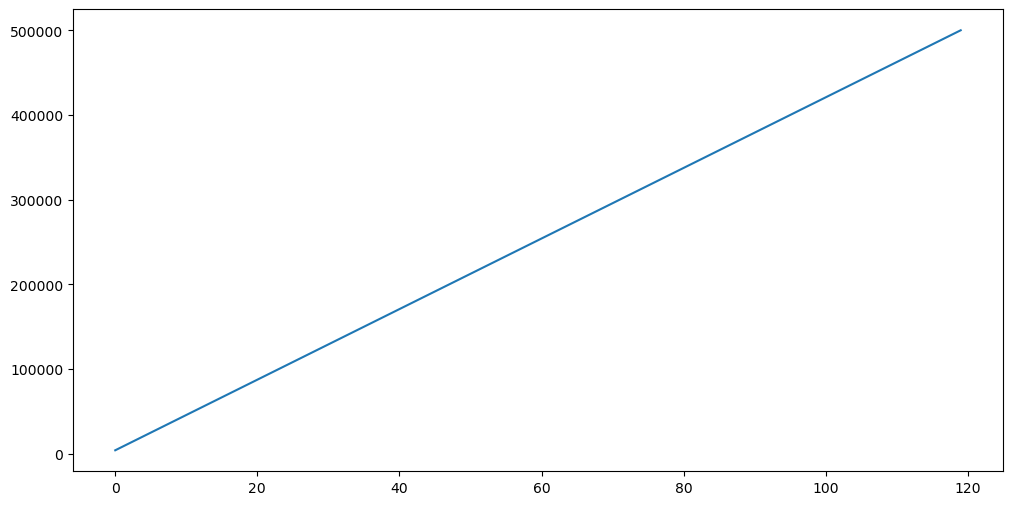

In [6]:
#set up model inflows
inflows = {'active_annual_income':50_000}
variables = {'start_date': "01/01/2020",
             'years':10}
income_gains_storage=[]
months = variables['years'] * 12

for month in range(months):
    income = inflows['active_annual_income']/12
    income_gains_storage.append(income)
plt.plot(pd.Series(income_gains_storage).cumsum()) #소득의 누적합 그래프
plt.show()

이제 소득에 세금이 부과된 경우를 고려해보자. 먼저 단순하게 세율이 25%라고 가정한다.

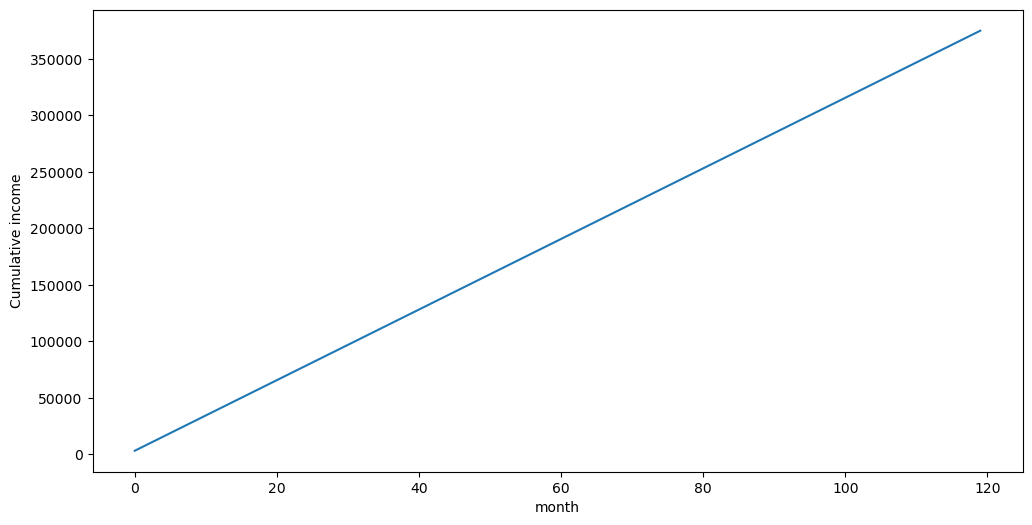

In [8]:
#set up model inflows
inflows = {'active_annual_income':50_000}
variables = {'start_date': "01/01/2020",
             'years':10,
             'tax_on_income': 0.25} # add tax rate
income_gains_storage=[]
months = variables['years'] * 12

for month in range(months):
    income = (inflows['active_annual_income'] * (1-variables['tax_on_income'])) / 12
    income_gains_storage.append(income)
    
plt.plot(pd.Series(income_gains_storage).cumsum()) #소득의 누적합 그래프
plt.xlabel('month')
plt.ylabel('Cumulative income')
plt.show()